In [1]:
import pprint
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix
import seaborn as sns

pd.set_option('display.expand_frame_repr', False)

team_data = pd.read_csv("data/team_averages.csv")
matches_data = pd.read_csv("data/full_data.csv")
matchup_data = matches_data[['match_id', 'Radiant', 'Dire', 'radiant_winner']]

matchup_data['diff_assists'] = 0
matchup_data['diff_denies'] = 0
matchup_data['diff_first_blood'] = 0
matchup_data['diff_gpm'] = 0
matchup_data['diff_healing'] = 0
matchup_data['diff_hero_damage'] = 0
matchup_data['diff_kills'] = 0
matchup_data['diff_last_hits'] = 0
matchup_data['diff_match_duration'] = 0
matchup_data['diff_total_levels'] = 0
matchup_data['diff_tower_damage'] = 0
matchup_data['diff_xpm'] = 0

def find_team_difference(team1, team2, i):
    #team_map = {'20 min afk les' : 0, 'ALPHA Red' : 1, 'Alliance' : 2, 'BOOM ID': 3, 'Battle Arena Elites' : 4, 'BlinkPool': 5, 'Double Dimension': 6 ,'Entity Gaming': 7 ,'Espada': 8 ,'Evil Geniuses': 9,'Fnatic': 10 ,'Immortals': 11 ,'Invictus Gaming': 12 ,'Kaipi': 13 ,'Kingdra': 14 ,'LeftOneTV':15 ,'MEGA-LADA E-sports': 16 ,'Mineski': 17,'New Guys': 18,'Newbee': 19,'No Bounty Hunter':20 ,'OG':21 ,'OpTic Gaming':22 ,'PSG.LGD':23 ,'SG e-sports team':24 ,'Sterling Global Dragons':25,'TEAM Baidu.':26 ,'TNC Predator':27 ,'TNC Tigers':28 ,'Team Empire': 29 ,'Team Kinguin': 30,'Team Leviathan': 31 ,'Team Liquid':32 ,'Team Secret':33 ,'Team Serenity': 34 ,'Team Singularity': 35 ,'The Final Tribe':36  ,'Torus Gaming': 37 ,'VGJ Storm': 38 ,'VGJ Thunder':39  ,'Vega Squadron':40  ,'Vici Gaming':41  ,'Virtus.pro':42  ,'Wind and Rain':43  ,'Winstrike':44 ,'compLexity Gaming':45  ,'jsut a squad':46  ,'paiN Gaming':47 ,'•': 48}
    team_map=team_map = {'Team Liquid' : 0, 'Evil Geniuses' : 1, 'PSG.LGD' : 2, 'OG': 3, 'Fnatic' : 4, ' VGJ.Thunder': 5, 'Mineski': 6 ,'Winstrike Team': 7 ,'Invictus Gaming': 8 ,'VGJ.Storm': 9,'Virtus.pro': 10 ,'Team Secret': 11 ,'OpTic Gaming': 12 ,'Newbee': 13 ,'TNC Predator': 14 ,'Team Serenity':15 ,'Vici Gaming': 16 ,'paiN Gaming': 17}
    team1_ix = team_map[team1]
    team2_ix = team_map[team2]

    matchup_data.loc[i, 'diff_assists'] = team_data.loc[team1_ix, 'assists'] - team_data.loc[team2_ix, 'assists']
    matchup_data.loc[i, 'diff_denies'] = team_data.loc[team1_ix, 'denies'] - team_data.loc[team2_ix, 'denies']
    matchup_data.loc[i, 'diff_first_blood'] = team_data.loc[team1_ix, 'first_blood'] - team_data.loc[team2_ix, 'first_blood']
    matchup_data.loc[i, 'diff_gpm'] = team_data.loc[team1_ix, 'gpm'] - team_data.loc[team2_ix, 'gpm']
    matchup_data.loc[i, 'diff_healing'] = team_data.loc[team1_ix, 'healing'] - team_data.loc[team2_ix, 'healing']
    matchup_data.loc[i, 'diff_hero_damage'] = team_data.loc[team1_ix, 'hero_damage'] - team_data.loc[team2_ix, 'hero_damage']
    matchup_data.loc[i, 'diff_kills'] = team_data.loc[team1_ix, 'kills'] - team_data.loc[team2_ix, 'kills']
    matchup_data.loc[i, 'diff_last_hits'] = team_data.loc[team1_ix, 'last_hits'] - team_data.loc[team2_ix, 'last_hits']
    matchup_data.loc[i, 'diff_match_duration'] = team_data.loc[team1_ix, 'match_duration'] - team_data.loc[team2_ix, 'match_duration']
    matchup_data.loc[i, 'diff_total_levels'] = team_data.loc[team1_ix, 'total_levels'] - team_data.loc[team2_ix, 'total_levels']
    matchup_data.loc[i, 'diff_tower_damage'] = team_data.loc[team1_ix, 'tower_damage'] - team_data.loc[team2_ix, 'tower_damage']
    matchup_data.loc[i, 'diff_xpm'] = team_data.loc[team1_ix, 'xpm'] - team_data.loc[team2_ix, 'xpm']

for x in range(0, len(matchup_data)):
    print(x, " of ", len(matchup_data))
    try:
        find_team_difference(matchup_data.loc[x,'Radiant'], matchup_data.loc[x, 'Dire'], x)
    except:
        print("Not able to find ", x)

matchup_data.to_csv("data/matchup_data.csv", index = False)

/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

0  of  381
Not able to find  0
1  of  381
Not able to find  1
2  of  381
Not able to find  2
3  of  381
Not able to find  3
4  of  381
Not able to find  4
5  of  381
Not able to find  5
6  of  381
Not able to find  6
7  of  381
Not able to find  7
8  of  381
Not able to find  8
9  of  381
Not able to find  9
10  of  381
Not able to find  10
11  of  381
Not able to find  11
12  of  381
Not able to find  12
13  of  381
Not able to find  13
14  of  381
Not able to find  14
15  of  381
Not able to find  15
16  of  381
Not able to find  16
17  of  381
Not able to find  17
18  of  381
Not able to find  18
19  of  381
Not able to find  19
20  of  381
Not able to find  20
21  of  381
Not able to find  21
22  of  381
Not able to find  22
23  of  381
Not able to find  23
24  of  381
Not able to find  24
25  of  381
Not able to find  25
26  of  381
Not able to find  26
27  of  381
Not able to find  27
28  of  381
Not able to find  28
29  of  381
Not able to find  29
30  of  381
Not able to find  

294  of  381
295  of  381
Not able to find  295
296  of  381
297  of  381
298  of  381
Not able to find  298
299  of  381
300  of  381
Not able to find  300
301  of  381
302  of  381
Not able to find  302
303  of  381
304  of  381
Not able to find  304
305  of  381
306  of  381
307  of  381
Not able to find  307
308  of  381
309  of  381
310  of  381
311  of  381
Not able to find  311
312  of  381
313  of  381
314  of  381
315  of  381
316  of  381
Not able to find  316
317  of  381
Not able to find  317
318  of  381
Not able to find  318
319  of  381
320  of  381
321  of  381
Not able to find  321
322  of  381
323  of  381
324  of  381
325  of  381
Not able to find  325
326  of  381
327  of  381
328  of  381
Not able to find  328
329  of  381
330  of  381
Not able to find  330
331  of  381
332  of  381
333  of  381
Not able to find  333
334  of  381
335  of  381
336  of  381
337  of  381
338  of  381
339  of  381
340  of  381
Not able to find  340
341  of  381
Not able to find  341
34

In [9]:

df=pd.read_csv('data/matchup_data.csv')
df = df[df.diff_hero_damage != 0]
df.reset_index(drop=True)

df.to_csv("data/matchup_data.csv", index=False)

,match_id,Radiant,Dire,radiant_winner,diff_assists,diff_denies,diff_first_blood,diff_gpm,diff_healing,diff_hero_damage,diff_kills,diff_last_hits,diff_match_duration,diff_total_levels,diff_tower_damage,diff_xpm
0,3967602199,Evil Geniuses,OpTic Gaming,0,-5.444444,-19.722222,4.888889,-30.166667,1249.611111,-9308.944444,-2.611111,-145.777778,-419.277778,-9.500000,-525.222222,-76.888889
1,3970279887,TNC Predator,Fnatic,0,17.583333,6.666667,-17.833333,319.666667,3104.750000,16701.000000,9.916667,101.416667,235.250000,12.166667,6733.250000,428.083333
2,3970454002,Fnatic,TNC Predator,1,-17.583333,-6.666667,17.833333,-319.666667,-3104.750000,-16701.000000,-9.916667,-101.416667,-235.250000,-12.166667,-6733.250000,-428.083333
3,4061660411,Fnatic,Team Liquid,0,-44.083333,-5.166667,20.708333,-504.041667,-9498.500000,-46509.000000,-18.291667,-244.791667,-670.875000,-26.666667,-7557.375000,-585.083333
4,4061671194,OG,PSG.LGD,0,-20.476190,8.380952,-61.095238,-203.523810,-267.476190,-28969.000000,-8.714286,-193.523810,-495.285714,-11.904762,-354.333333,-252.809524
5,4061694810,Mineski,Invictus Gaming,0,-1.458333,-6.791667,-16.166667,-103.375000,210.333333,-15054.916667,-1.333333,-148.166667,-259.500000,-9.791667,-1762.291667,-163.291667
6,4061721528,OG,PSG.LGD,1,-20.476190,8.380952,-61.095238,-203.523810,-267.476190,-28969.000000,-8.714286,-193.523810,-495.285714,-11.904762,-354.333333,-252.809524
7,4061742840,Fnatic,Team Liquid,1,-44.083333,-5.166667,20.708333,-504.041667,-9498.500000,-46509.000000,-18.291667,-244.791667,-670.875000,-26.666667,-7557.375000,-585.083333
8,4061766981,Mineski,Invictus Gaming,1,-1.458333,-6.791667,-16.166667,-103.375000,210.333333,-15054.916667,-1.333333,-148.166667,-259.500000,-9.791667,-1762.291667,-163.291667
9,4061802430,OpTic Gaming,Virtus.pro,0,-5.513889,-2.819444,8.319444,-129.208333,-1960.694444,-3898.888889,-4.972222,-52.347222,-86.180556,-0.916667,-2786.319444,-93.486111


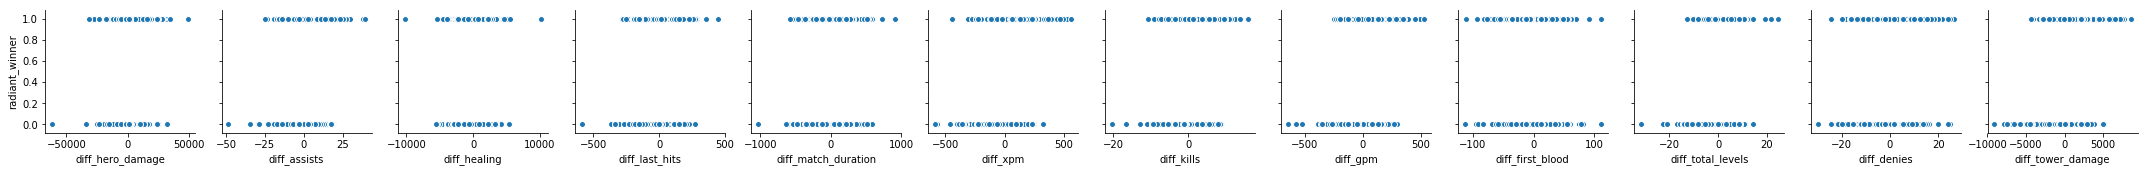

In [26]:
import seaborn as sns

lg=sns.pairplot(df,x_vars={'diff_assists', 'diff_denies','diff_first_blood','diff_gpm','diff_healing','diff_hero_damage','diff_kills','diff_last_hits','diff_match_duration','diff_total_levels','diff_tower_damage','diff_xpm','diff_healing'},y_vars='radiant_winner')

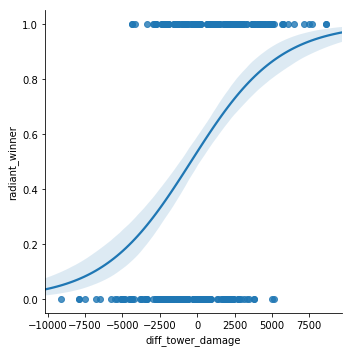

In [27]:
g = sns.lmplot(x="diff_tower_damage", y="radiant_winner", data=df, logistic=True)

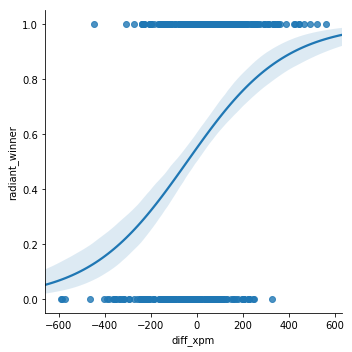

In [28]:
g = sns.lmplot(x="diff_xpm", y="radiant_winner", data=df, logistic=True)